# 1. Plotting with matplotlib

Run using ``ipython3 nbconvert --to slides --post serve basic-numpy.ipynb``

In [4]:
# For easier python 2 compatibility:
from __future__ import division, print_function, absolute_import
# Normal imports:
import numpy as np

In [16]:
# In the ipython notebook, make it aware of matplotlib:
%matplotlib inline
import matplotlib
# And fix the default savefig dpi that ipython sets very low
matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['xtick.labelsize'] = 'small'
matplotlib.rcParams['ytick.labelsize'] = 'small'

# Import interactive interface to matplotlib:
from matplotlib import pyplot as plt

## 1.1 Simple plot example:

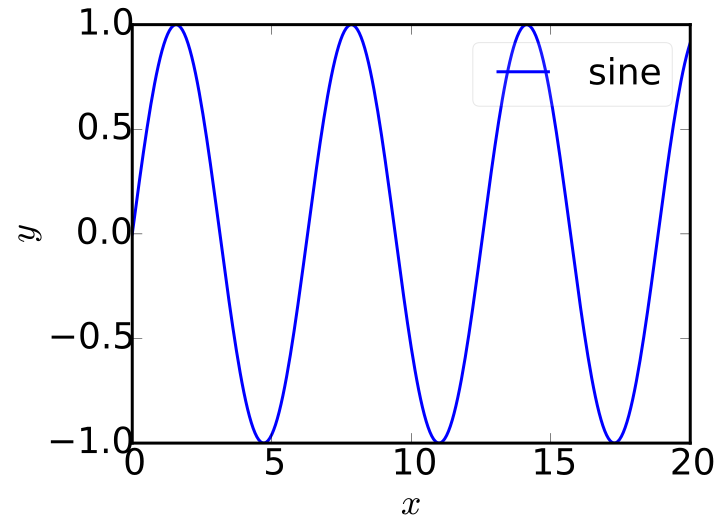

In [6]:
x = np.linspace(0, 20, 301)
plt.plot(x, np.sin(x), label='sine')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

## 1.2 Controlling markers, color, linewidth and more

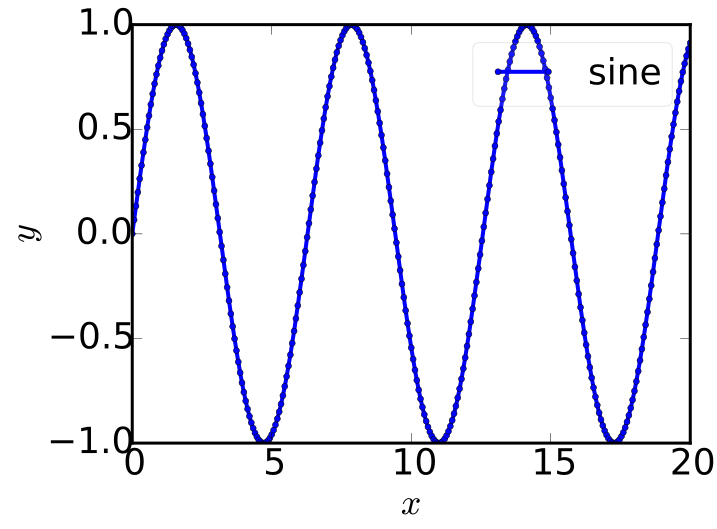

In [10]:
x = np.linspace(0, 20, 301)
y = np.sin(x)
plt.plot(x, y, 'o-', label='sine', linewidth=4)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

## 1.3 Multiple axes:

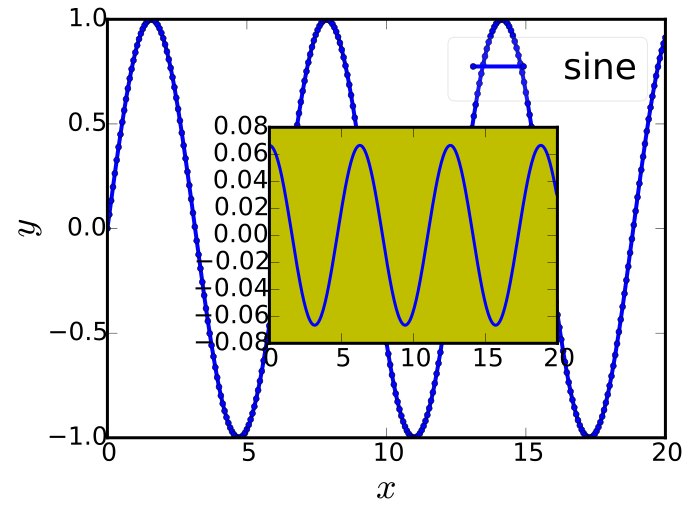

In [24]:
x = np.linspace(0, 20, 301)
y = np.sin(x)
plt.plot(x, y, 'o-', label='sine', linewidth=4)
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')

a = plt.axes([.35, .3, .4, .4], axisbg='y')
a.plot(x, np.gradient(y))


## 1.4 Subplots

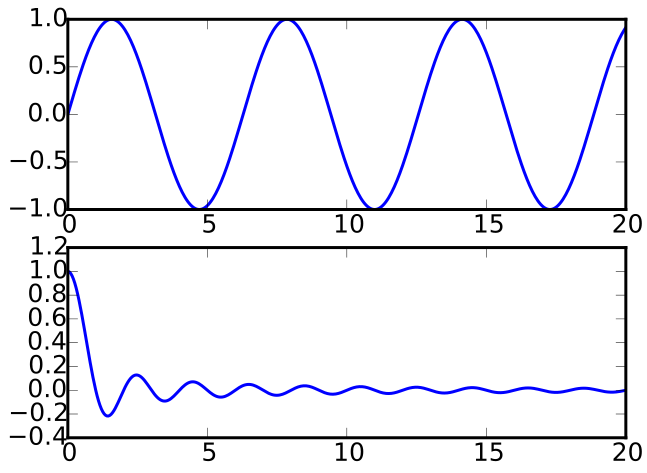

In [36]:
x = np.linspace(0, 20, 401)
plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))
plt.subplot(2, 1, 2)
plt.plot(x, np.sinc(x))

# 2. Scatter plot

In [26]:
datasize = (100, 100)
data = np.random.rand(*datasize)

In [30]:
sample_size = 20
random_x = np.random.choice(np.arange(datasize[0]), size = sample_size)
random_y = np.random.choice(np.arange(datasize[0]), size = sample_size)

random_sample = data[random_x, random_y]

/home/dmanik/venvs/teaching/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


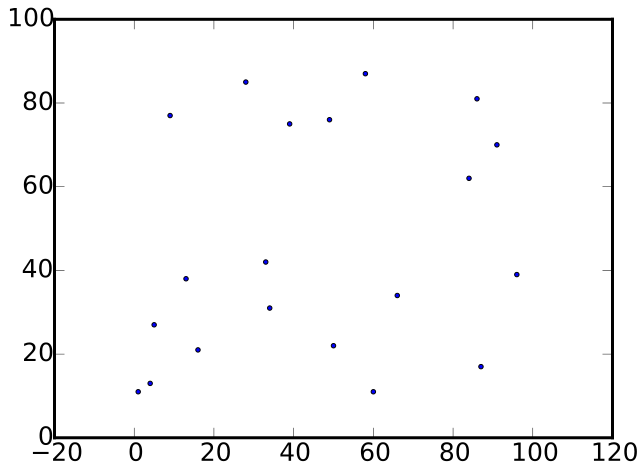

In [32]:
plt.scatter(random_x, random_y)

/home/dmanik/venvs/teaching/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


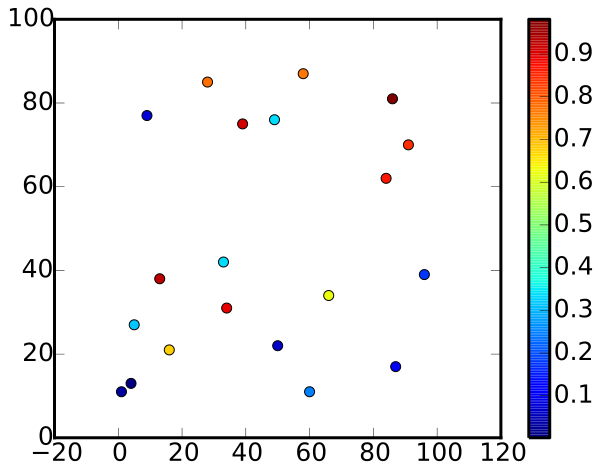

In [35]:
plt.scatter(random_x, random_y, s = 100, c = data[random_x, random_y])
plt.colorbar()

# 3. Some exercise:

-  Plot a the sine function from 0 to 6 (inclusinve) using 50 points.
-  Plot the line again in red and with diamond shaped markers of size 5.
-  Now plot the line, but include a legend.

*Helpful functions*: ``plt.plot``, ``plt.legend``, ``plt.grid``

In [ ]:
Try to recreate the following plot:
    

In [38]:
from IPython.display import Image

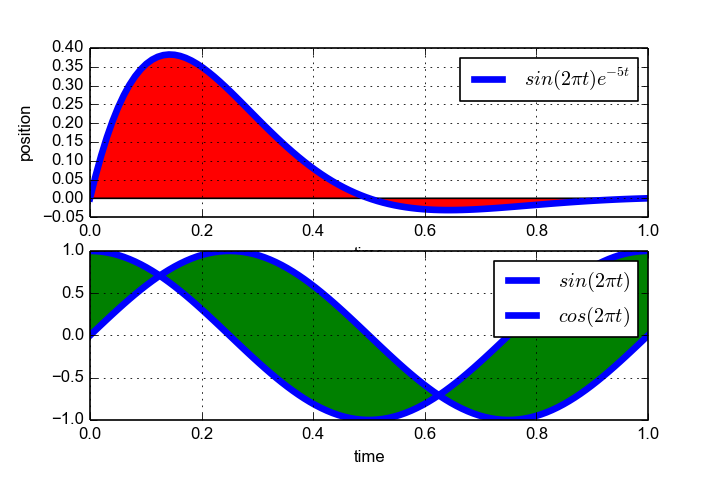

In [41]:
Image("../exercises/pics/simple_plotting_2.png")

## 3.1 Moving average:

In [143]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

npts = 1000
x = np.linspace(0, 4, npts)
y = np.sin(x) + np.random.normal(scale = 0.01, size = npts)

window = 10
y_avgd = moving_average(y, n = window)

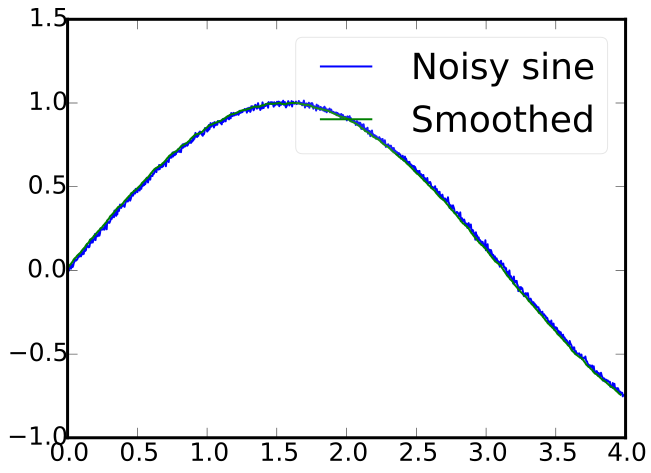

In [147]:
plt.plot(x, y, linewidth = 2, label = "Noisy sine")
plt.plot(x[:-window+1], y_avgd, linewidth = 2, label = "Smoothed")
plt.legend()

## 3.2 Colormesh

<matplotlib.colorbar.Colorbar instance at 0x7f2e141a0e60>

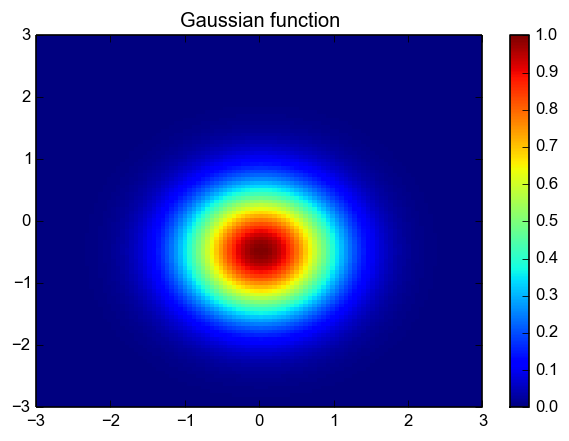

In [127]:
x = y = np.linspace(-3, 3, 101)
plt.title('Gaussian function')
values = np.exp(-(x**2 + (y[:, None] + 0.5)**2))
plt.pcolormesh(x, y, values)
plt.colorbar()

### 3.2.1 Contourplot

<matplotlib.contour.QuadContourSet instance at 0x7f2e1982e0e0>

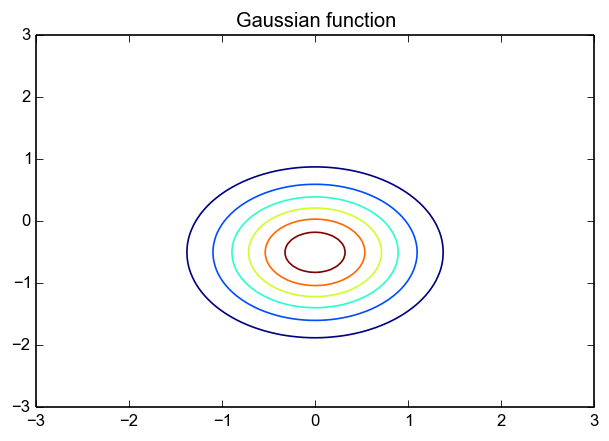

In [93]:
x = y = np.linspace(-3, 3, 101)
plt.title('Gaussian function')
values = np.exp(-(x**2 + (y[:, None] + 0.5)**2))
plt.contour(x, y, values)

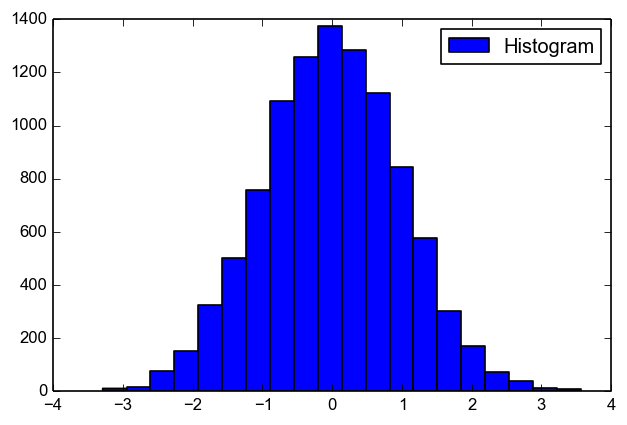

In [94]:
from scipy.stats import norm
random = norm.rvs(size=10000)
plt.hist(random, bins=20, label='Histogram')
plt.legend()

# 4. Animation

In [ ]:
maxn= 10
x = np.random.uniform(size=(maxn, 500))

fig = plt.figure()
ax = plt.axes()
#line, = ax.plot([], [], lw=2)

def init():
    ax.hist(x[0, :], normed = True)
    return ax,

def animate(i):
    ax.clear()
    ax.hist(np.sum(x[:i+1, :], axis = 0), normed = True)
    ax.set_title("N = %d"%i)
    return ax,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=maxn, interval=200, blit=False)


## 4.1 Image reading and displaying:

In [279]:
d = plt.imread('bricks.jpg')
plt.imshow(d)

FileNotFoundError: [Errno 2] No such file or directory: 'bricks.jpg'

# 5. Exercise:

Often one needs to reduce the size of a digital image by *downsampling*: i.e. only choose a smaller number of pixels from an image.

Downsample the image 'bricks.jpg' by selecting every 2nd or 3rd pixel along each axis (x and y). 

Are there any surprising artefacts in the resulting image?

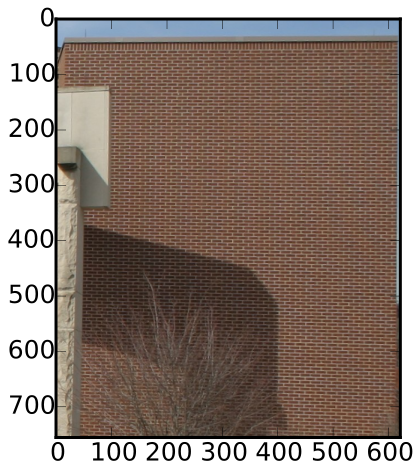

In [278]:
sampling_rate = 1
plt.imshow(d[::sampling_rate, ::sampling_rate])

## 5.1 And after all the serious stuff, some tools to make cool webcomic:

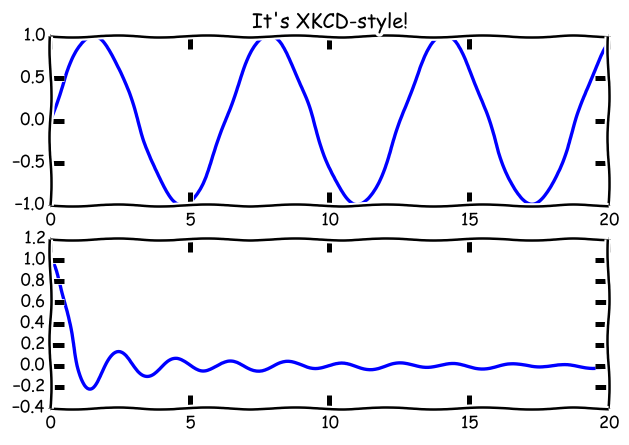

In [129]:
with plt.xkcd():
    x = np.linspace(0, 20, 401)
    sub1 = plt.subplot(2, 1, 1)
    plt.title("It's XKCD-style!")
    plt.plot(x, np.sin(x))
    plt.subplot(2, 1, 2)
    plt.plot(x, np.sinc(x))

## 5.2 More Examples

* Many, many very good examples at the **Gallery**:

    http://matplotlib.org/gallery


* Examples for animations, Graphical User Interface:
    
    http://matplotlib.org/examples/index.html


## 5.3 Conclusions

We have seen:
  1. How to do convenient, fast math in **NumPy**
  2. Where to find many useful tools with **SciPy and friends**
  3. How to make beautiful graphics with **matplotlib**
 
Last point:
   1. Do *not* reinvent the wheel
   2. Algorithms matter
   3. "Premature optimization is the root of all evil" – Donald Knuth